In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD")

# Preview the dataset
print(df.head())
print(df.info())


         ID Case Number                    Date                 Block  IUCR  \
0  11037294    JA371270  03/18/2015 12:00:00 PM     0000X W WACKER DR  1153   
1  11646293    JC213749  12/20/2018 03:00:00 PM  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333  05/01/2016 12:25:00 AM   055XX S ROCKWELL ST  1153   
3  11645959    JC211511  12/20/2018 04:00:00 PM    045XX N ALBANY AVE  2820   
4  11645601    JC212935  06/01/2014 12:01:00 AM   087XX S SANGAMON ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  

In [ ]:
# Print the number of null values in each column separately
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,13767
Arrest,0
Domestic,0


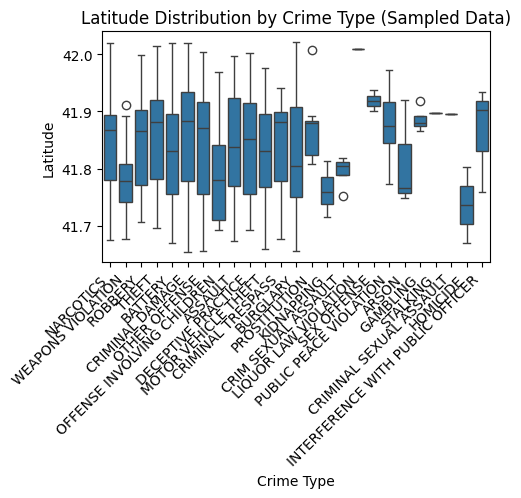

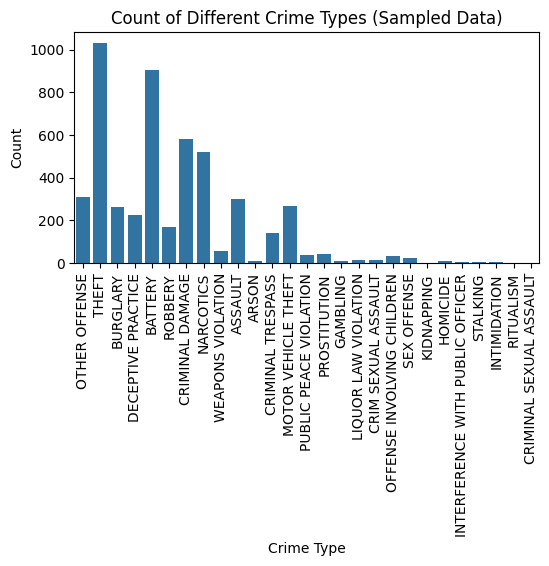

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example 2: Boxplot of a numerical column grouped by a categorical column
plt.figure(figsize=(5, 3))
sns.boxplot(x='Primary Type', y='Latitude', data=df.dropna(subset=['Latitude', 'Primary Type']).sample(n=1000)) # Sample for performance
plt.xlabel('Crime Type')
plt.ylabel('Latitude')
plt.title('Latitude Distribution by Crime Type (Sampled Data)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Example 3: Countplot of a categorical column
plt.figure(figsize=(6, 3))
sns.countplot(x='Primary Type', data=df.sample(n=5000)) # Sample for better visualization
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Count of Different Crime Types (Sampled Data)')
plt.xticks(rotation=90)
plt.show()



In [ ]:
print("Column Names:", df.columns.tolist())
print("Number of Columns:", len(df.columns))
df.shape

Column Names: ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']
Number of Columns: 22


(8207110, 22)

In [ ]:
# Drop irrelevant columns
df = df.drop(['ID', 'Case Number', 'Block', 'Description'], axis=1)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values if needed
df = df.dropna()

# Encode categorical columns
df['Primary Type'] = df['Primary Type'].astype('category').cat.codes
df['Location Description'] = df['Location Description'].astype('category').cat.codes
df['Arrest'] = df['Arrest'].astype('int')
df['Domestic'] = df['Domestic'].astype('int')

# Select features and target variable
X = df[['Primary Type', 'Location Description', 'Domestic']]
y = df['Arrest']  # Predicting if an arrest was made


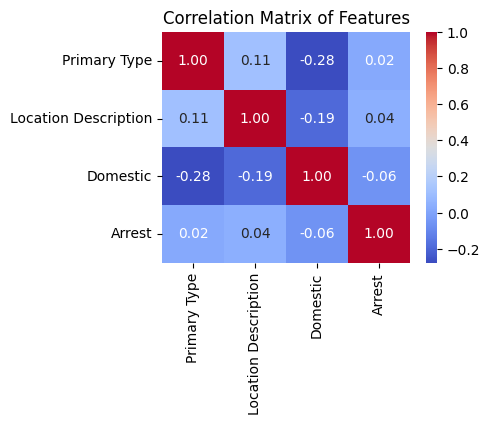

In [ ]:
import seaborn as sns

# Assuming you want a heatmap of the correlation between features
correlation_matrix = df[['Primary Type', 'Location Description', 'Domestic', 'Arrest']].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Training data size: 5250898
Testing data size: 2250385


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities for ROC-AUC
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Calculate metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")

# Print testing metrics
print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")


Training Metrics:
Accuracy: 0.8788957622105781
Precision: 0.8673399749946701
Recall: 0.6125462203884972
F1 Score: 0.7180090268188224
ROC AUC Score: 0.8920807860555612

Testing Metrics:
Accuracy: 0.8785861085991953
Precision: 0.8654308607236225
Recall: 0.6127178961869271
F1 Score: 0.7174717345581864
ROC AUC Score: 0.8916612824116954


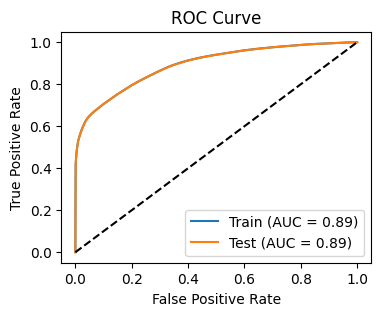

In [ ]:

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

[[1630230   53945]
 [ 219283  346927]]
[[3805416  123825]
 [ 512081  809576]]


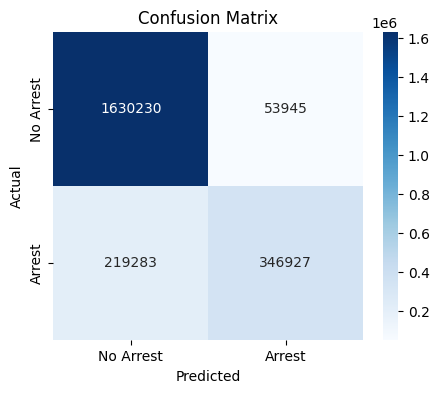

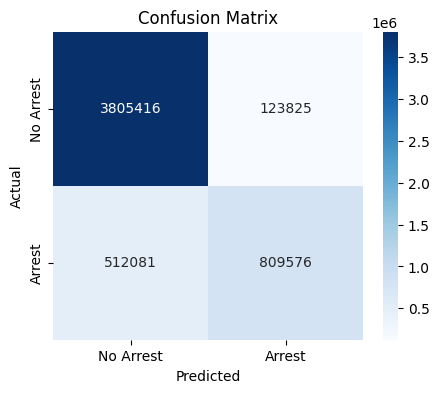

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_test_pred are already defined from your model's predictions

cm = confusion_matrix(y_test, y_test_pred)
cm1=confusion_matrix(y_train,y_train_pred)
print(cm)
print(cm1)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from xgboost import XGBClassifier

# Instantiate the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

#predict on both training and testing sets
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Predict probabilities for ROC_Curve
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_train_pred_proba_xgb = xgb_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Calculate metrics for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")

# Print testing metrics
print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")


Training Metrics:
Accuracy: 0.8788957622105781
Precision: 0.8673399749946701
Recall: 0.6125462203884972
F1 Score: 0.7180090268188224
ROC AUC Score: 0.8920807860555612

Testing Metrics:
Accuracy: 0.8785861085991953
Precision: 0.8654308607236225
Recall: 0.6127178961869271
F1 Score: 0.7174717345581864
ROC AUC Score: 0.8916612824116954


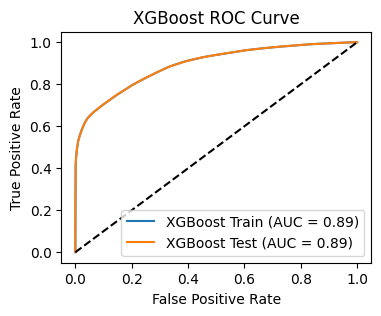

In [ ]:
# prompt: print roc curve for both testing training

fpr_train_xgb, tpr_train_xgb, thresholds_train_xgb = roc_curve(y_train, y_train_pred_proba_xgb)
fpr_test_xgb, tpr_test_xgb, thresholds_test_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Plot ROC curve for XGBoost
plt.figure(figsize=(4, 3))
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'XGBoost Train (AUC = {roc_auc_score(y_train, y_train_pred_proba_xgb):.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGBoost Test (AUC = {roc_auc_score(y_test, y_pred_proba_xgb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

[[1629883   54292]
 [ 219250  346960]]
[[3804373  124868]
 [ 512370  809287]]


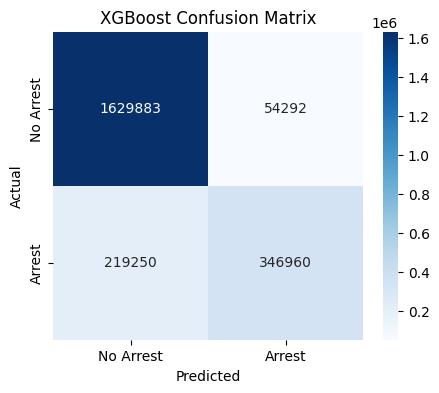

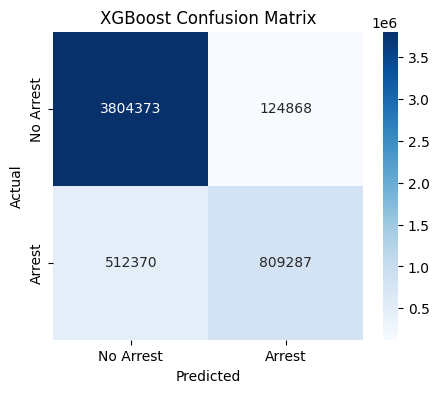

In [ ]:
# prompt: give confusion matrix

# Assuming y_test and y_test_pred_xgb are already defined from your XGBoost model's predictions
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
cm1_xgb=confusion_matrix(y_train,y_train_pred_xgb)
print(cm_xgb)
print(cm1_xgb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(cm1_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]
y_train_pred_proba_dt = decision_tree.predict_proba(X_train)[:, 1]

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
train_precision = precision_score(y_train, y_train_pred_dt)
train_recall = recall_score(y_train, y_train_pred_dt)
train_f1 = f1_score(y_train, y_train_pred_dt)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba_dt)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
test_precision = precision_score(y_test, y_test_pred_dt)
test_recall = recall_score(y_test, y_test_pred_dt)
test_f1 = f1_score(y_test, y_test_pred_dt)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"ROC AUC Score: {train_roc_auc}")

# Print testing metrics
print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"ROC AUC Score: {test_roc_auc}")


Training Metrics:
Accuracy: 0.8788976666467335
Precision: 0.869038304027794
Recall: 0.6109300673321444
F1 Score: 0.7174769946009731
ROC AUC Score: 0.8920958352842452

Testing Metrics:
Accuracy: 0.8786145481773119
Precision: 0.8671225119765881
Recall: 0.6112202186467919
F1 Score: 0.7170229208492088
ROC AUC Score: 0.8915956537090746


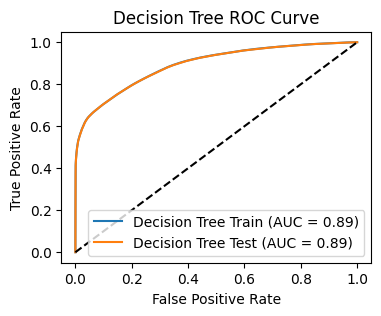

[[1631142   53033]
 [ 220131  346079]]
[[3807562  121679]
 [ 514217  807440]]


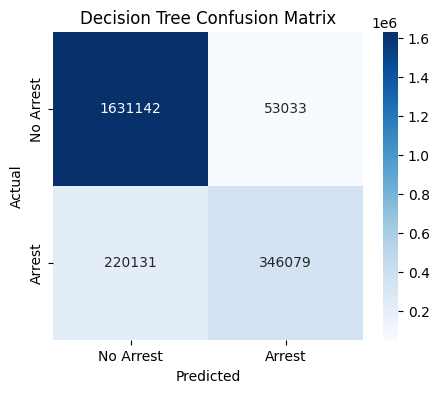

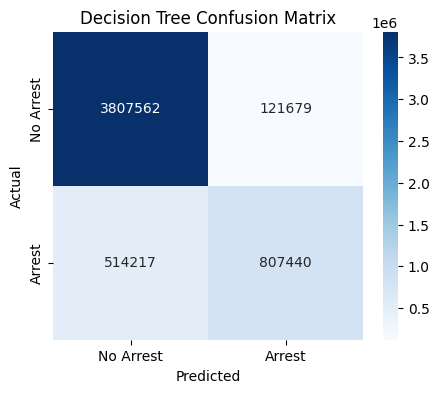

In [ ]:

fpr_train_dt, tpr_train_dt, thresholds_train_dt = roc_curve(y_train, y_train_pred_proba_dt)
fpr_test_dt, tpr_test_dt, thresholds_test_dt = roc_curve(y_test, y_pred_proba_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(4, 3))
plt.plot(fpr_train_dt, tpr_train_dt, label=f'Decision Tree Train (AUC = {roc_auc_score(y_train, y_train_pred_proba_dt):.2f})')
plt.plot(fpr_test_dt, tpr_test_dt, label=f'Decision Tree Test (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Assuming y_test and y_test_pred_dt are already defined from your Decision Tree model's predictions
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm1_dt=confusion_matrix(y_train,y_train_pred_dt)
print(cm_dt)
print(cm1_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(cm1_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_train_pred_gbc = gbc.predict(X_train)
y_test_pred_gbc = gbc.predict(X_test)

y_train_pred_proba_gbc = gbc.predict_proba(X_train)[:, 1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:, 1]

accuracy_score_train_gbc = accuracy_score(y_train, y_train_pred_gbc)
precision_score_train_gbc = precision_score(y_train, y_train_pred_gbc)
recall_score_train_gbc = recall_score(y_train, y_train_pred_gbc)
f1_score_train_gbc = f1_score(y_train, y_train_pred_gbc)
roc_auc_score_train_gbc = roc_auc_score(y_train, y_train_pred_proba_gbc)

accuracy_score_test_gbc = accuracy_score(y_test, y_test_pred_gbc)
precision_score_test_gbc = precision_score(y_test, y_test_pred_gbc)
recall_score_test_gbc = recall_score(y_test, y_test_pred_gbc)
f1_score_test_gbc = f1_score(y_test, y_test_pred_gbc)
roc_auc_score_test_gbc = roc_auc_score(y_test, y_pred_proba_gbc)

print("Training Metrics:")
print(f"Accuracy: {accuracy_score_train_gbc}")
print(f"Precision: {precision_score_train_gbc}")
print(f"Recall: {recall_score_train_gbc}")
print(f"F1 Score: {f1_score_train_gbc}")
print(f"ROC AUC Score: {roc_auc_score_train_gbc}")

print("\nTesting Metrics:")
print(f"Accuracy: {accuracy_score_test_gbc}")
print(f"Precision: {precision_score_test_gbc}")
print(f"Recall: {recall_score_test_gbc}")
print(f"F1 Score: {f1_score_test_gbc}")
print(f"ROC AUC Score: {roc_auc_score_test_gbc}")



Training Metrics:
Accuracy: 0.8696857185190038
Precision: 0.9144828052615561
Recall: 0.5320170059251379
F1 Score: 0.6726864397253361
ROC AUC Score: 0.8759864316619497

Testing Metrics:
Accuracy: 0.869568096125774
Precision: 0.9132913809723006
Recall: 0.5321223574292224
F1 Score: 0.6724479638614989
ROC AUC Score: 0.875971988499173


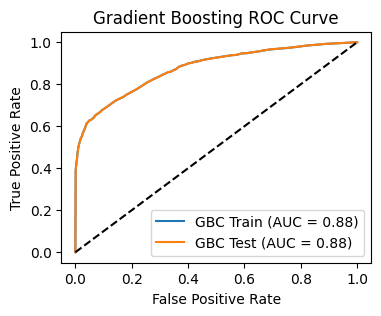

In [ ]:

fpr_train_gbc, tpr_train_gbc, thresholds_train_gbc = roc_curve(y_train, y_train_pred_proba_gbc)
fpr_test_gbc, tpr_test_gbc, thresholds_test_gbc = roc_curve(y_test, y_pred_proba_gbc)

# Plot ROC curve for Gradient Boosting Classifier
plt.figure(figsize=(4, 3))
plt.plot(fpr_train_gbc, tpr_train_gbc, label=f'GBC Train (AUC = {roc_auc_score(y_train, y_train_pred_proba_gbc):.2f})')
plt.plot(fpr_test_gbc, tpr_test_gbc, label=f'GBC Test (AUC = {roc_auc_score(y_test, y_pred_proba_gbc):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

[[1655570   28605]
 [ 264917  301293]]
[[3863487   65754]
 [ 618513  703144]]


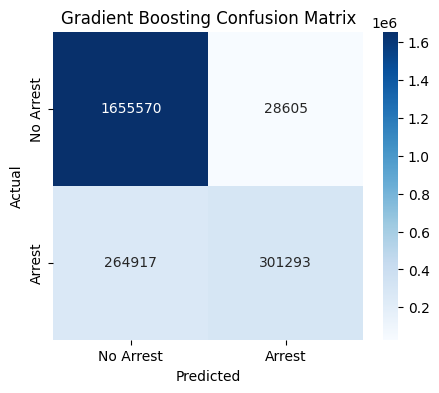

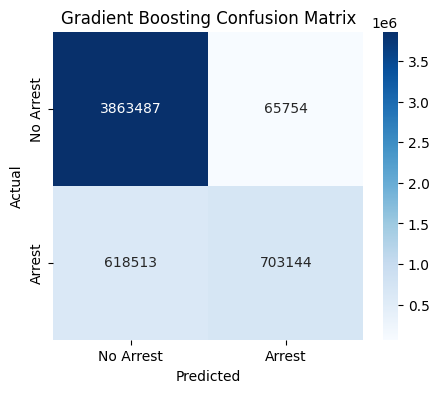

In [ ]:


# Assuming y_test and y_test_pred_gbc are already defined from your Gradient Boosting model's predictions
cm_gbc = confusion_matrix(y_test, y_test_pred_gbc)
cm1_gbc=confusion_matrix(y_train,y_train_pred_gbc)
print(cm_gbc)
print(cm1_gbc)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(cm1_gbc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Arrest', 'Arrest'],
            yticklabels=['No Arrest', 'Arrest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

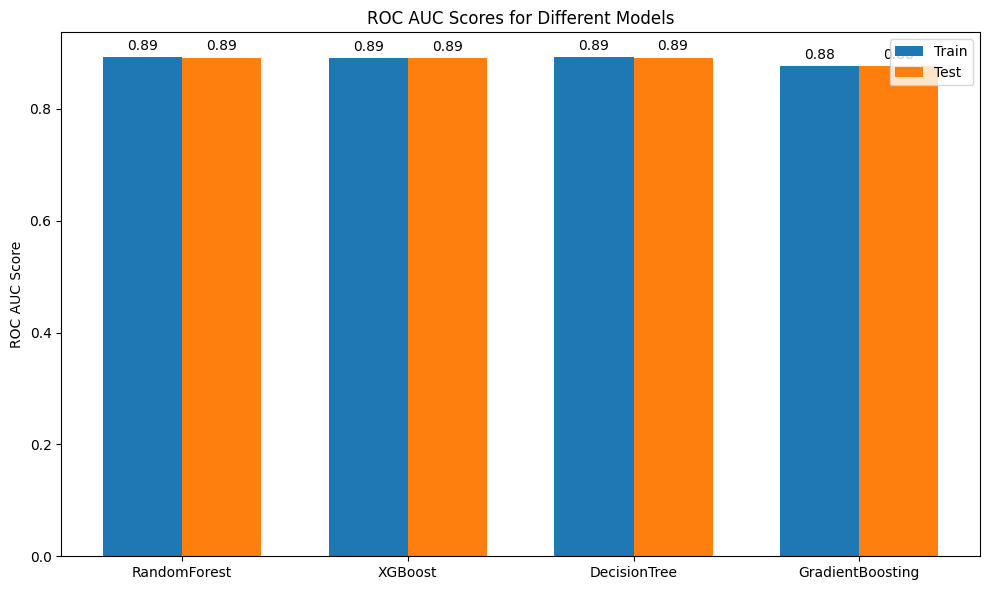

In [ ]:

import matplotlib.pyplot as plt

# Assuming you have the following metrics for each model:
models = {
    'RandomForest': {'train': train_roc_auc, 'test': test_roc_auc},
    'XGBoost': {'train': roc_auc_score(y_train, y_train_pred_proba_xgb), 'test': roc_auc_score(y_test, y_pred_proba_xgb)},
    'DecisionTree': {'train': roc_auc_score(y_train, y_train_pred_proba_dt), 'test': roc_auc_score(y_test, y_pred_proba_dt)},
    'GradientBoosting': {'train': roc_auc_score(y_train, y_train_pred_proba_gbc), 'test': roc_auc_score(y_test, y_pred_proba_gbc)}
}


# Create the bar graph
width = 0.35
x = range(len(models))
train_scores = [models[model]['train'] for model in models]
test_scores = [models[model]['test'] for model in models]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], train_scores, width, label='Train')
rects2 = ax.bar([i + width/2 for i in x], test_scores, width, label='Test')

# Add labels, title, and legend
ax.set_ylabel('ROC AUC Score')
ax.set_title('ROC AUC Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.legend()

# Add value annotations to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()